# Project Details
<p><img style="float: left;margin:5px 20px 5px 1px" src="https://assets.datacamp.com/production/project_20/img/ignaz_semmelweis_1860.jpeg"></p>

This is Dr. Ignaz Semmelweis, a Hungarian physician born in 1818 and active at the Vienna General Hospital. If Dr. Semmelweis looks troubled it's probably because he's thinking about **childbed fever**: A deadly disease affecting women that just have given birth. He is thinking about it because in the early 1840s at the Vienna General Hospital as many as **10% of the women giving birth die from it**. He is thinking about it because he knows **the cause of childbed fever: It's the contaminated hands of the doctors delivering the babies**. And they won't listen to him and wash their hands!


### Objectives
* Reanalyze the data that made Semmelweis discover the importance of handwashing. 
* Looking at the data that made Semmelweis realize that something was wrong with the procedures at Vienna General Hospital.


# Preparing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
yearly = pd.read_csv('yearly_deaths_by_clinic.csv')

yearly.info()
yearly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [41]:
monthly = pd.read_csv('monthly_deaths.csv', parse_dates=['date'])

monthly.info()
monthly.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    98 non-null     datetime64[ns]
 1   births  98 non-null     int64         
 2   deaths  98 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.4 KB


,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


# Analyzing

In [7]:
yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


The table above shows the number of women giving birth at the two clinics at the Vienna General Hospital for the years **1841 to 1846.** You'll notice that giving birth was very dangerous; an alarming number of women died as the result of childbirth, most of them from childbed fever.

#### The proportion of deaths out of the number of women giving birth.

In [13]:
# Calculate proportion of deaths per no. births
yearly['proportion_deaths'] = (yearly['deaths']/yearly['births'])

clinic_1 = yearly[yearly['clinic'] == 'clinic 1']
clinic_2 = yearly[yearly['clinic'] == 'clinic 2']

In [16]:
display(clinic_1)
clinic_2

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


,year,births,deaths,clinic,proportion_deaths
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004
10,1845,3241,66,clinic 2,0.020364
11,1846,3754,105,clinic 2,0.027970


#### Death at the clinics
If we now plot the proportion of deaths at both Clinic 1 and Clinic 2 we'll see a curious pattern…

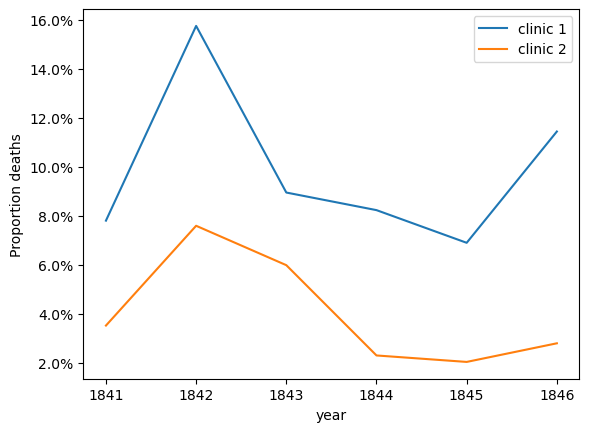

In [35]:
ax = clinic_1.plot(x='year', y='proportion_deaths', label='clinic 1')
clinic_2.plot(x='year', y='proportion_deaths', label='clinic 2', ax=ax)

plt.ylabel('Proportion deaths')

from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1))

plt.show()

### The handwashing begins
Why is the proportion of deaths consistently so much higher in Clinic 1? Semmelweis saw the same pattern and was puzzled and distressed. The only difference between the clinics was that many medical students served at Clinic 1, while mostly midwife students served at Clinic 2. **While the midwives only tended to the women giving birth, the medical students also spent time in the autopsy rooms examining corpses.**

Semmelweis started to suspect that something on the corpses spread from the hands of the medical students, caused childbed fever. So in a desperate attempt to stop the high mortality rates, he decreed: Wash your hands! This was an unorthodox and controversial request, **nobody in Vienna knew about bacteria at this point in time.**

Let's load in monthly data from Clinic 1 to see if the handwashing had any effect.

In [43]:
monthly.head()

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


In [46]:
monthly['proportion_deaths'] = monthly['deaths']/monthly['births']
monthly.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


### The effect of handwashing
With the data loaded we can now look at the proportion of deaths over time. In the plot below we haven't marked where obligatory handwashing started, but it reduced the proportion of deaths to such a degree that you should be able to spot it!

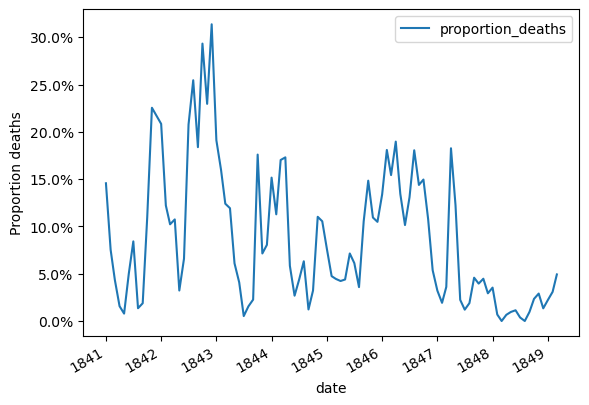

In [49]:
ax = monthly.plot(x='date', y='proportion_deaths', ylabel="Proportion deaths")

from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1))

plt.show()

In [52]:
monthly['date'].dt.year.unique()

array([1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849], dtype=int64)

### The effect of handwashing highlighted
Starting from the summer of **1847** the proportion of deaths is drastically reduced and, yes, this was when **Semmelweis made handwashing obligatory.**

The effect of handwashing is made even more clear if we highlight this in the graph.

In [53]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

# Split monthly into before and after handwashing_start
before_washing = monthly[monthly['date'] < handwashing_start]
after_washing = monthly[monthly['date'] > handwashing_start]

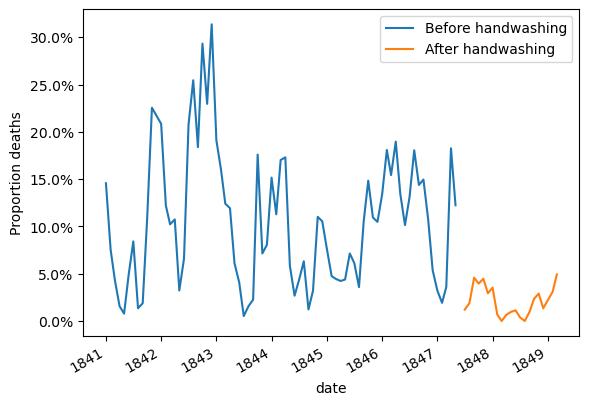

In [56]:
ax = before_washing.plot(x='date', y='proportion_deaths', label='Before handwashing')
after_washing.plot(x='date', y='proportion_deaths', label='After handwashing', ax=ax)

plt.ylabel('Proportion deaths')

from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1))

plt.show()

### More handwashing, fewer deaths?
Again, the graph shows that handwashing had a huge effect. **How much did it reduce the monthly proportion of deaths on average?**

In [57]:
before_proportion = before_washing['proportion_deaths']
after_proportion = after_washing['proportion_deaths']

In [68]:
mean_diff = after_proportion.mean() - before_proportion.mean()
mean_diff

-0.08401825915965425

In [87]:
print(f'The average proportion of deaths before handwashing: {round(before_proportion.mean()*100, 2)}% of births')

The average proportion of deaths before handwashing: 10.5% of births


In [86]:
print(f'The average proportion of deaths after handwashing: {round(after_proportion.mean()*100, 2)}% of births')

The average proportion of deaths after handwashing: 2.1% of births


**We can see**

It reduced the proportion of deaths by around **8 percentage points!** From 10% on average to just 2% (which is still a high number by modern standards).

### A Bootstrap analysis of Semmelweis handwashing data
To get a feeling for **the uncertainty** around how much handwashing reduces mortalities we could look at a confidence interval (here calculated using **the bootstrap method**).

`A bootstrap analysis` is a quick way of getting at the uncertainty of an estimate. A bootstrap analysis works by simulating redoing the data collection by drawing randomly from the data and allowing a value to be drawn many times. 

In [88]:
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append( boot_after.mean() - boot_before.mean() )

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025   -0.101387
0.975   -0.067413
dtype: float64

### The fate of Dr. Semmelweis
**So handwashing reduced the proportion of deaths by between 6.7 and 10 percentage points, according to a 95% confidence interval.** All in all, it would seem that Semmelweis had solid evidence that handwashing was a simple but highly effective procedure that could save many lives.

The tragedy is that, despite the evidence, Semmelweis' theory — that childbed fever was caused by some "substance" (what we today know as bacteria) from autopsy room corpses — was ridiculed by contemporary scientists. The medical community largely rejected his discovery and in 1849 he was forced to leave the Vienna General Hospital for good.

One reason for this was that statistics and statistical arguments were uncommon in medical science in the 1800s. Semmelweis only published his data as long tables of raw data, but he didn't show any graphs nor confidence intervals. If he would have had access to the analysis we've just put together he might have been more successful in getting the Viennese doctors to wash their hands.

In [92]:
# The data Semmelweis collected points to that:
doctors_should_wash_their_hands = True

**Note**

This project is one of DataCamp Projects.

`DONE ON`: 23.09.2021